In [22]:
from matplotlib import pyplot as plt
from PIL import Image as PILImage
from quantiphy import Quantity
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
%matplotlib widget

In [2]:
# %pip install quantiphy

In [ ]:
from calibrate import CalibrationManual
cm=CalibrationManual()
cm.load_calibration(r"..\..\example\data\set_a\a_5x.miscal")
cm.distances

In [ ]:
qty=Quantity(f"{cm.distances['length']} {cm.distances['length_unit']}")
print(qty)
print(qty.real)
print(qty.units)

In [ ]:
qty2=Quantity("10nm")
print(qty2)
print(qty2.real)
print(qty2.units)

qty3=Quantity("200um")
print(qty3)
print(qty3.real)
print(qty3.units)

qty4=Quantity("200 angstrom")
print(qty4)
print(qty4.real)
print(qty4.units)

qty5=Quantity("1in")
print(qty5)
print(qty5.real)
print(qty5.units)

ratio=qty3/qty2
print(ratio)

In [ ]:
blended_image_fp=r"..\..\example\expected_result\set_a\a_mycanvas_blend.jpg"
fig = plt.figure()
plt.imshow(PILImage.open(blended_image_fp).transpose(2))
scale_bar=AnchoredSizeBar(
    plt.gca().transData,
    int(cm.distances["pixel"]),
    str(Quantity(f"{cm.distances['length']} {cm.distances['length_unit']}")),
    'upper left',
    pad=0.4,borderpad=0.5,sep=2,frameon=True,
)
plt.gca().add_artist(scale_bar)
plt.show()



# Prototype 2

In [1]:
from matplotlib import pyplot as plt
from PIL import Image as PILImage
from quantiphy import Quantity
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from calibrate import CalibrationManual
%matplotlib widget

In [2]:
scale_value_to_show="2 mm"
location="upper left"
blended_image_fp=r"..\..\example\expected_result\set_a\a_mycanvas_blend.jpg"
calibration_fp=r"..\..\example\data\set_a\a_5x.miscal"

In [ ]:
cm=CalibrationManual()
cm.load_calibration(calibration_fp)
print(cm.distances)
pixel_distance=cm.distances["pixel"]
length_quantity=Quantity(f"{cm.distances['length']} {cm.distances['length_unit']}")

In [4]:
quantity_to_show=Quantity(scale_value_to_show)
ratio=quantity_to_show/length_quantity
pixels_to_show=ratio*pixel_distance

In [ ]:
fig = plt.figure()
plt.imshow(PILImage.open(blended_image_fp).transpose(2))
scale_bar=AnchoredSizeBar(
    plt.gca().transData,
    int(pixels_to_show),
    scale_value_to_show,
    'upper left',
    pad=0.5,borderpad=0.5,sep=2,frameon=True,
)
plt.gca().add_artist(scale_bar)
plt.show()

# Module Planning
- Image/figure source - either opening an image or using current figure
- Calibration source - either calibration in current mis project, calibration file, or from user specified relationship?

In [1]:
from matplotlib import pyplot as plt
from matplotlib import axes
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from PIL import Image as PILImage
from quantiphy import Quantity
from calibrate import CalibrationManual
%matplotlib widget

In [2]:
scale_value_to_show="2 mm"
blended_image_fp=r"..\..\example\expected_result\set_a\a_mycanvas_blend.jpg"
calibration_fp=r"..\..\example\data\set_a\a_5x.miscal"

In [3]:
cm=CalibrationManual()
cm.load_calibration(calibration_fp)
cal=cm.distances

In [48]:
def add_scale_bar(axes:axes.Axes,
                  scale_measurement:str,
                  calibration:dict,
                  **AnchoredSizeBar_kwargs:dict
                  ):
    # Generate scale
    pixel_distance=calibration["pixel"]
    length_quantity=Quantity(f"{calibration['length']} {calibration['length_unit']}")
    scale_measure_quantity=Quantity(scale_measurement)
    scale_ratio=scale_measure_quantity/length_quantity
    pixels_scaled=scale_ratio*pixel_distance
    # AnchoredSizeBar arg setup
    asb_kwargs={
        "loc":'upper left',
        "pad":0.5,
        "borderpad":0.5,
        "sep":2,
        "frameon":True,
    }
    for key,value in AnchoredSizeBar_kwargs.items():
        asb_kwargs[key]=value
    # Creates and add scale bar to axes
    scale_bar=AnchoredSizeBar(
        axes.transData,
        int(pixels_scaled),
        scale_measurement,
        **asb_kwargs
    )
    axes.add_artist(scale_bar)
def image_with_scale_bar(image_fp:str,
                  scale_measurement:str,
                  calibration:dict,
                  **AnchoredSizeBar_kwargs:dict
                  ):
    plt.figure()
    plt.imshow(PILImage.open(image_fp))
    add_scale_bar(plt.gca(),scale_measurement,calibration,**AnchoredSizeBar_kwargs)
    plt.show()

In [ ]:
plt.figure()
plt.imshow(PILImage.open(blended_image_fp).transpose(2))
plt.show()

In [41]:
add_scale_bar(plt.gca(),"500 um",cal)

In [ ]:
image_with_scale_bar(blended_image_fp,"50um",cal,loc="lower right")

# Module Testing

In [7]:
from calibrate import CalibrationManual
from scale_bar import add_scale_bar,image_with_scale_bar
from matplotlib import pyplot as plt
from PIL import Image as PILImage
%matplotlib widget

In [2]:
scale_value_to_show="2 mm"
blended_image_fp=r"..\..\example\expected_result\set_a\a_mycanvas_blend.jpg"
calibration_fp=r"..\..\example\data\set_a\a_5x.miscal"

In [3]:
cm=CalibrationManual()
cm.load_calibration(calibration_fp)
cal=cm.distances

In [ ]:
plt.figure()
plt.imshow(PILImage.open(blended_image_fp).transpose(2))
plt.show()

In [10]:
add_scale_bar(plt.gca(),"500 um",cal)

In [ ]:
image_with_scale_bar(blended_image_fp,"50um",cal,loc="lower right")

In [1]:
from calibrate import CalibrationManual
from scale_bar import image_with_scale_bar
%matplotlib inline

In [6]:
scale_value_to_show="0.5 mm"
blended_image_fp=r"..\..\example\expected_result\set_a\a_mycanvas_blend.jpg"
calibration_fp=r"..\..\example\data\set_a\a_5x.miscal"

In [7]:
cm=CalibrationManual()
cm.load_calibration(calibration_fp)
cal=cm.distances

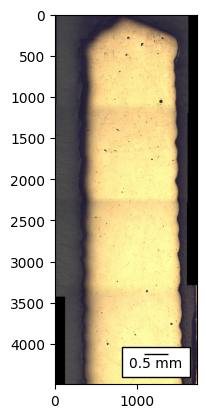

In [8]:
image_with_scale_bar(blended_image_fp,scale_value_to_show,cal,loc="lower right")